# LAB 10: FACTORS, DATA IMPORTING and PLOTTING

## QUESTION 1

Let's use the built-in data **mtcars** in R. 


In order to show the relationship between miles per gallon and number of cylinders, we will build a boxplot. 


1) Create a function called **box_mt** which create a boxplot for values of **mpg**, classified with respect to **cyl** values. 


* Plot will be named as **Box Plots Miles Per Gallon**, x-axis will be named as **Number of Cylinders**, and y-axis will be named as **Miles Per Gallon**. The first box will be named as **4 cyl**, the second as **6 cyl**, and the third as **8 cyl**.


* The first box should be colored with yellow, the second with blue, and the third with pink. 


Your box plot has to look like:

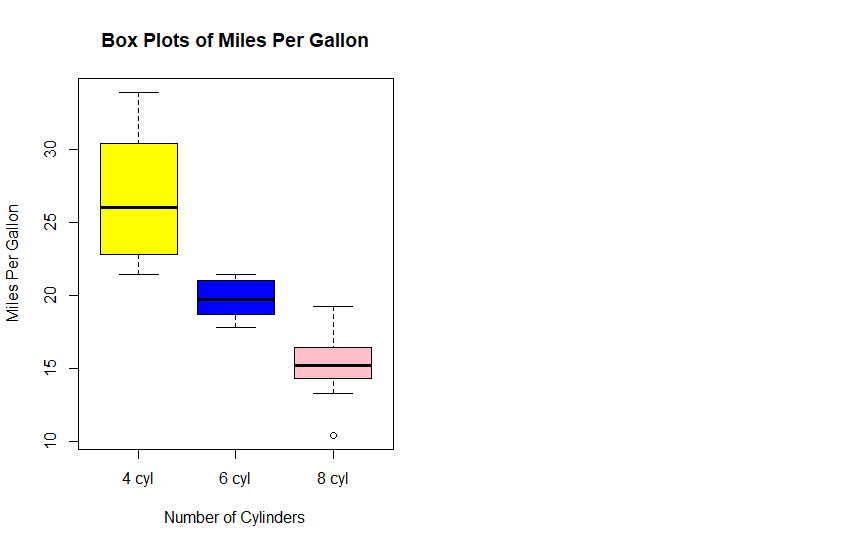

*Hint: You should use subsetting inside the function.*

## SOLUTION 1

In [ ]:
#1
box_mt <- function(){

x1 <- mtcars$mpg[mtcars$cyl==4]
x2 <- mtcars$mpg[mtcars$cyl==6]
x3 <- mtcars$mpg[mtcars$cyl==8]

boxplot(x1, x2, x3, names=c("4 cyl", "6 cyl", "8 cyl"),
        xlab="Number of Cylinders",
        ylab="Miles Per Gallon", 
        main=("Box Plots of Miles Per Gallon"),
        col=c("yellow", "blue", "pink"))
}

box_mt()

## QUESTION 2

First, download the **coordinates.csv** file from the files section in Binder to your computer.

We will import it to R.

In order to import a file, you first need to set the working directory of R to the directory that contains the data file.

A working directory can be specified as such (with your own address, of course):

```R
> setwd("C:/Users/Ömer/Desktop/Ders/CMPE 140")
```

Or, you can click on *Session* in the toolbar, then go to *Set Working Directory* and finally click on *Choose Directory* to set it manually.

The default shortcut for this operation is *Ctrl+Shift+H*.

After setting up the working directory, you can import your data set as such:

```R
> coordinates <- read.csv("coordinates.csv", header = FALSE)
```
If your data set has column names, you can write *header = TRUE* or nothing as it is the default setting for this function.

If your data file is in *.txt* format, you can import is as such:

```R
> coordinates <- read.table("coordinates.txt", header = FALSE)
```

Finally, if it's in *.rdata* format, you can import it as such:

```R
> load("coordinates.rdata")
```

and use it by calling the object **coordinates**.

**coordinates** contains the latitudes and longitudes of every province center in Turkey.

Let's examine it:

```R
> head(coordinates)

              V1       V2       V3
1          Adana 36.99142 35.33083
2       Adiyaman 37.76365 38.27726
3 Afyonkarahisar 38.75689 30.53870
4           Agri 39.71907 43.05059
5         Amasya 40.65646 35.83735
6         Ankara 39.93336 32.85974
```

First, let's assign the name **province** to the first column, **latitude** to the second column and **longitude** to the last column.

```R
> head(coordinates)

        province latitude longitude
1          Adana 36.99142  35.33083
2       Adiyaman 37.76365  38.27726
3 Afyonkarahisar 38.75689  30.53870
4           Agri 39.71907  43.05059
5         Amasya 40.65646  35.83735
6         Ankara 39.93336  32.85974
```

Next, create a factor called **region** that will:

- take the value **southwest** if the city's latitude is smaller than 39 and it's longitude is smaller than 35 
- take the value **southeast** if the city's latitude is smaller than 39 and it's longitude is larger than 35 
- take the value **northwest** if the city's latitude is larger than 39 and it's longitude is smaller than 35 
- take the value **northeast** if the city's latitude is larger than 39 and it's longitude is larger than 35 

Then, append **region** to **coordinates** and show the first 6 lines as such:

```R
> head(coordinates)

        province latitude longitude    region
1          Adana 36.99142  35.33083 Southeast
2       Adiyaman 37.76365  38.27726 Southeast
3 Afyonkarahisar 38.75689  30.53870 Southwest
4           Agri 39.71907  43.05059 Northeast
5         Amasya 40.65646  35.83735 Northeast
6         Ankara 39.93336  32.85974 Northwest
```

*Hint: You can either create two seperate factors using the ``cut()`` function and then combine them or you can create the factor directly with a for loop and if statements. In order to convert a vector to a factor, use the ``as.factor()`` function.*


Let's see the number of provinces in each region:

```R
> summary(region)

Northeast Northwest Southeast Southwest 
       20        25        20        16 
```


## SOLUTION 2

In [ ]:
setwd("C:/Users/Ömer/Desktop/Ders/CMPE 140")
coordinates <- read.csv("coordinates.csv", header = FALSE)
coordinates <- read.table("coordinates.txt", header = FALSE)
load("coordinates.rdata")

head(coordinates)

names(coordinates) <- c("province", "latitude", "longitude")
head(coordinates)

#First alternative
region.1 <- cut(coordinates$latitude,breaks = c(36,39,42.5), labels = c("South","North"))
region.2 <- cut(coordinates$longitude,breaks = c(26,35,44.5), labels = c("West","East"))
region <- c()
for (i in 1:81)
{
    if (region.1[i] == "South" && region.2[i] == "West")
    {    
    region[i] <- "Southwest"     
    }
    else if (region.1[i] == "South" && region.2[i] == "East")
    {    
    region[i] <- "Southeast"     
    }
    else if (region.1[i] == "North" && region.2[i] == "West")
    {    
    region[i] <- "Northwest"     
    }
    else 
    {    
    region[i] <- "Northeast"     
    }
}

region <- as.factor(region)
coordinates <- cbind(coordinates, region) 

head(coordinates)

#Second alternative
region <- c()
for (i in 1:81)
{
    if (coordinates[i,2] < 39 && coordinates[i,3] < 35)
    {    
    region[i] <- "Southwest"     
    }
    else if (coordinates[i,2] < 39 && coordinates[i,3] >= 35)
    {    
    region[i] <- "Southeast"     
    }
    else if (coordinates[i,2] >= 39 && coordinates[i,3] < 35)
    {    
    region[i] <- "Northwest"     
    }
    else 
    {    
    region[i] <- "Northeast"     
    }
}

region <- as.factor(region)
coordinates <- cbind(coordinates, region) 

head(coordinates)

summary(region)

## QUESTION 3

1) Create a factor **ex_fac** using the following information about the intensities of the daily exercises done by an individual in a week. 

| days      | intensity |
|-----------|-----------|
| monday    | intense   |
| tuesday   | light     |
| wednesday | none      |
| thursday  | intense   |
| friday    | light     |
| saturday  | none      |
| sunday    | none      |

2) Create a function **weekly_ex** which takes a factor argument **f** that contains the intensity of the daily exercises that a person does in a week. Your function should find the days of the week that the individual works out (so the intensity must be "intense" or "light") and submit those days in a list's first element which has **"well_done"** as a name. Then it should find the days that the individual does not work out (so the intensity must be "none") and submit those in the list's second element that has **"shame"** as a name. Lastly, your function should replace the "none"s in the factor **f** with "light"s and submit the new factor in the last element of the list which has a name of **"next_week"** (remember doing the necessary arrangement in the levels of the factor). 

3) Try your function with **ex_fac**. Output must be as such:
```r
> weekly_ex(ex_fac)

$well_done
[1] "monday"   "tuesday"  "thursday" "friday"  

$shame
[1] "wednesday" "saturday"  "sunday"   

$next_week
[1] intense light   light   intense light   light   light  
Levels: light intense

```

## SOLUTION 3

In [ ]:
#1
ex_fac <- factor(c("intense", "light", "none", "intense", "light", "none", "none"))

#2
weekly_ex <- function(f)
{
  week <- c("monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday")
  well_done <- week[f != "none"]
  shame <- week[f == "none"]
  f[f == "none"] <- "light"
  f <- droplevels(f)
  thelist <- list(well_done = well_done, shame = shame, next_week = f)
  return(thelist)
}

#3
weekly_ex(ex_fac)

## QUESTION 4

Zoom would like to know the demographic of the people using their application for their studies in Turkey. They selected 8 people randomly, whose information is provided below:

|Name|Age|Purpose|
|:--:|:--:|:---:|
|Cemal|55|Entertainment|
|Derya|34|Class|
|Hande|19|Class|
|Mehmet|17|Entertainment|
|Mine|27|Work|
|Furkan|10|Class|
|Helen|13|Class|
|Fatma|63|Work|



1) Vectorize the data in this table with the names **Name**, **Age**, and **Purpose**.


2) Convert the **Age** vector into a factor and name it **Age_Factor**.


3) Convert the **Purpose** vector into a factor and name it **Purpose_Factor**.


4) Zoom wants to combine the students and workers using this app into a single category in order to compare people who are using Zoom professionally or for entertainment. Combine them under the name **Professionally**.


5) Create a data frame using the factors you have created in the previous steps and name it **zoom**. Your data frame should look like this.

```r
> zoom

    Name Age        Purpose
1  Cemal  55  Entertainment
2  Derya  34 Professionally
3  Hande  19 Professionally
4 Mehmet  17  Entertainment
5   Mine  27 Professionally
6 Furkan  10 Professionally
7  Helen  13 Professionally
8  Fatma  63 Professionally
```


6) Use the `summary()` function to show Zoom the general overview of the users.

```r
> summary(zoom)

     Name                Age              Purpose 
 Length:8           10     :1   Entertainment :2  
 Class :character   13     :1   Professionally:6  
 Mode  :character   17     :1                     
                    19     :1                     
                    27     :1                     
                    34     :1                     
                    (Other):2        
```

## SOLUTION 4

In [ ]:
#1
Name <- c("Cemal", "Derya", "Hande", "Mehmet", "Mine", "Furkan", "Helen", "Fatma")
Age <- c(55, 34, 19, 17, 27, 10, 13, 63)
Purpose <- c("Entertainment", "Class", "Class","Entertainment", "Work", "Class", "Class", "Work")

#2
Age_Factor <- factor(Age)
Age_Factor

#3
Purpose_Factor <- factor(Purpose)
Purpose_Factor

#4
levels(Purpose_Factor) <- c(levels(Purpose_Factor), "Professionally")
Purpose_Factor[Purpose_Factor == "Work"] <- c("Professionally")
Purpose_Factor[Purpose_Factor == "Class"] <- c("Professionally")
Purpose_Factor <- droplevels(Purpose_Factor)
Purpose_Factor

#5
zoom <- data.frame(Name, Age = Age_Factor, Purpose = Purpose_Factor)
zoom

#6 
summary(zoom)

## QUESTION 5

The psychology department of a university accepts students for its double major programme after eliminating the applicants in four steps :
 * In the first step, students who are not from Sociology department are eliminated.
 * In the second step, students with a GPA lower than 3.5 are eliminated.
 * In the third step, students with a GPA lower than the mean of GPA's of the students who had made it to this step are eliminated.
 * In the forth step , there will be an interview with the remaining students.

```r
RNGversion("3.3.1")
```
 
1) Copy the line above. Set seed to 3. Create 2 vectors named **gpas** which holds the GPAs of 40 applicants and **departments** which holds the departments of the applicants. GPAs are uniformly distributed 40 numbers between 3.30 and 4.00. Use two digits after decimal points. Departments are a sample choosen from three departments : "Sociology", "History", "Economics". (Do not change the order.)

```r
> gpas

[1] 3.42 3.87 3.57 3.53 3.72 3.72 3.39 3.51 3.70 3.74 3.66 3.65 3.67 3.69 3.91 3.88 3.38 3.79 3.93
[20] 3.50 3.46 3.31 3.39 3.37 3.47 3.85 3.72 3.94 3.69 3.83 3.57 3.56 3.42 3.62 3.48 3.54 3.92 3.44
[39] 3.71 3.45

> departments
 [1] "Sociology" "Economics" "Sociology" "History"   "History"   "Sociology" "Sociology"
 [8] "Sociology" "Sociology" "Economics" "Sociology" "Sociology" "Economics" "Economics"
[15] "Economics" "Economics" "History"   "Sociology" "Sociology" "Sociology" "Economics"
[22] "Sociology" "Economics" "Sociology" "Economics" "Sociology" "Economics" "History"  
[29] "History"   "Sociology" "Economics" "Economics" "Economics" "Economics" "History"  
[36] "History"   "Sociology" "Sociology" "Economics" "Economics"
```



2) Create a data frame named **applicants** with **gpas** and **departments** as such :
 
```r
> applicants
            GPA Department
Student 1  3.42  Sociology
Student 2  3.87  Economics
Student 3  3.57  Sociology
.
.
.
Student 39 3.71  Economics
Student 40 3.45  Economics

```

3) Create a function named **dbl_mjr** with one argument **dta** which has **applicants** as its default value. The function should do the following:
  * First, it will decide which applicants should pass the first step. Then it will create a global object named **first_step** which is a table (use `table()`) which shows the number of rejected students in the first step and the number of students which made it to the second step.
  * It will do the same thing for the second and third steps while creating global objects **second_step** and **third_step**.
  * It will return a data frame which holds information about the students which made it to the interview step. As such:
 
 ```r
>  dbl_mjr(dta = applicants) 
            GPA Department    Result
Student 18 3.79  Sociology Interview
Student 19 3.93  Sociology Interview
Student 26 3.85  Sociology Interview
Student 30 3.83  Sociology Interview
Student 37 3.92  Sociology Interview
 ```
 ```r
>  first_step
Result
   Rejected Second Step 
         23          17 
>  second_step
Result
  Rejected Third Step 
         6         11 
>  third_step
Result
 Rejected Interview 
        6         5 
```

*Hint: You can use the operator ``<<-`` for defining global objects in a local environment.*

4) Create another function named **general** with one argument **dta** which has **applicants** as its default value. The function should return a table which holds the number of eliminated students in each steps and number of students which made it to the interviews. 

**Rejected(1)** indicates that the student is eliminated in step 1. **Rejected(2)** in step 2 and so on. **Interview** indicates that the student made it to the final step. 
   
```r
> general(dta = applicants)
General Result
  Interview Rejected(1) Rejected(2) Rejected(3) 
          5          23           6           6
```

5) Plot 4 pie charts in the same image. First pie chart should show the information of the **first_step** and so on. Forth pie chart should show the general result which you can find using the **general** function.

Your charts should look like this:

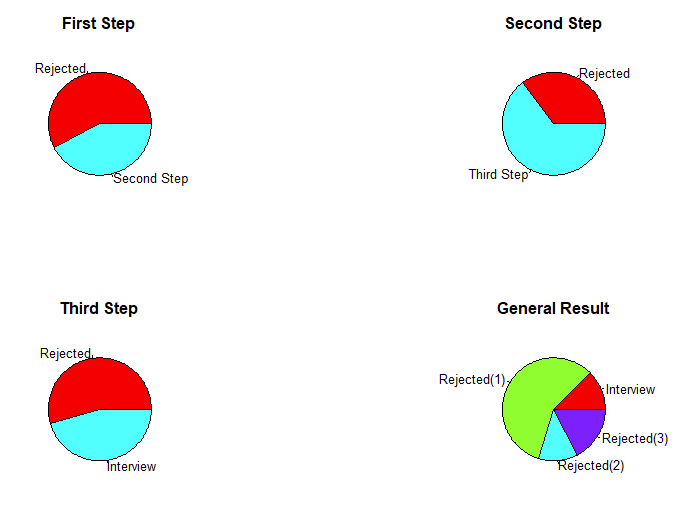

## SOLUTION 5

In [ ]:
#1
RNGversion("3.3.1")
set.seed(3)
gpas <- round(runif(40, min = 3.3, max = 4),digit = 2)
departments <- sample(size = 40, c("Sociology", "History", "Economics"), replace = T)
gpas
departments

#2
st_num <- paste("Student", 1:40) #Creating the vector which holds the row names of the data frame
applicants <- data.frame("GPA" = gpas,"Department" = departments)
rownames(applicants) <- st_num
applicants

#3
dbl_mjr <- function(dta = applicants)
{
  scnd <- c()
  for(i in 1:nrow(dta))
  {
    if(dta[i,2] == "Sociology")
    f <- "Second Step"
    else f <-"Rejected"
    scnd <- c(scnd, f) # scnd is a vector indicating whether the applicant rejected or not.
  }
  
  first_step <<- table("Result" = scnd) # Creating the table. "<<-" makes it global.
  dta1 <- cbind(dta,"Result" = scnd)
  dta2 <- dta1[dta1[,3 ] == "Second Step",] #Eliminating the rejected students in the first step and continuing with other students.
  
  thrd <- cut(dta2$GPA,breaks = c(-Inf,3.5,+Inf),labels = c("Rejected","Third Step")) #Creating the a factor object thrd which has the similar duty with scnd.
  second_step <<- table("Result" = thrd)
  dta3 <- cbind(dta2[,-3],"Result" = thrd)
  dta4 <- dta3[dta3[,3] == "Third Step",]
  

  mns <- mean(dta4$GPA) #Calculating the mean of GPAs of remaining students.
  
  intr <- cut(dta4$GPA, breaks = c(-Inf, mns, +Inf), labels = c("Rejected", "Interview"))
  third_step <<- table("Result" = intr)
  dta5 <- cbind(dta4[,-3], "Result" = intr)
  dta6 <- dta5[dta5[,3] == "Interview",] #dta6 holds only the students which made it to the interview step.
  
  
  return(dta6)
  
}


 dbl_mjr(dta = applicants) 
 first_step #first_step is a global object, so we can run this code outside of the function.
 second_step
 third_step

#4
general <- function(dta = applicants)
{
  
      dta_3rd <- dta[dta$GPA > 3.5 & dta$Department == "Sociology",] 
      mm <- mean(dta_3rd$GPA) #The mean of the students in the third step. 
      xx <-c()
      for(i in 1:nrow(dta)) # xx vectors holds the results of each student respectively.
      {
        if(dta[i,2] != "Sociology")
          xx <- c(xx, "Rejected(1)")
        else if(dta[i,1] <= 3.5)
          xx <- c(xx, "Rejected(2)")
        else if(dta[i,1] <= mm)
          xx <- c(xx, "Rejected(3)")
        else xx <- c(xx, "Interview")
      }
     
  return(table("General Result" = xx))
}
general(dta = applicants)

#5
par(mfrow = c(2,2)) #Using par() to show several graphs in one image. 
pie(first_step, main = "First Step", col = rainbow(2))
pie(second_step, main = "Second Step",col = rainbow(2))
pie(third_step, main = "Third Step", col = rainbow(2))
pie(general(applicants), main = "General Result", col = rainbow(4))    